<a href="https://colab.research.google.com/github/jmccentee1488/Tawhiri/blob/master/SwingVideoProcessRotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

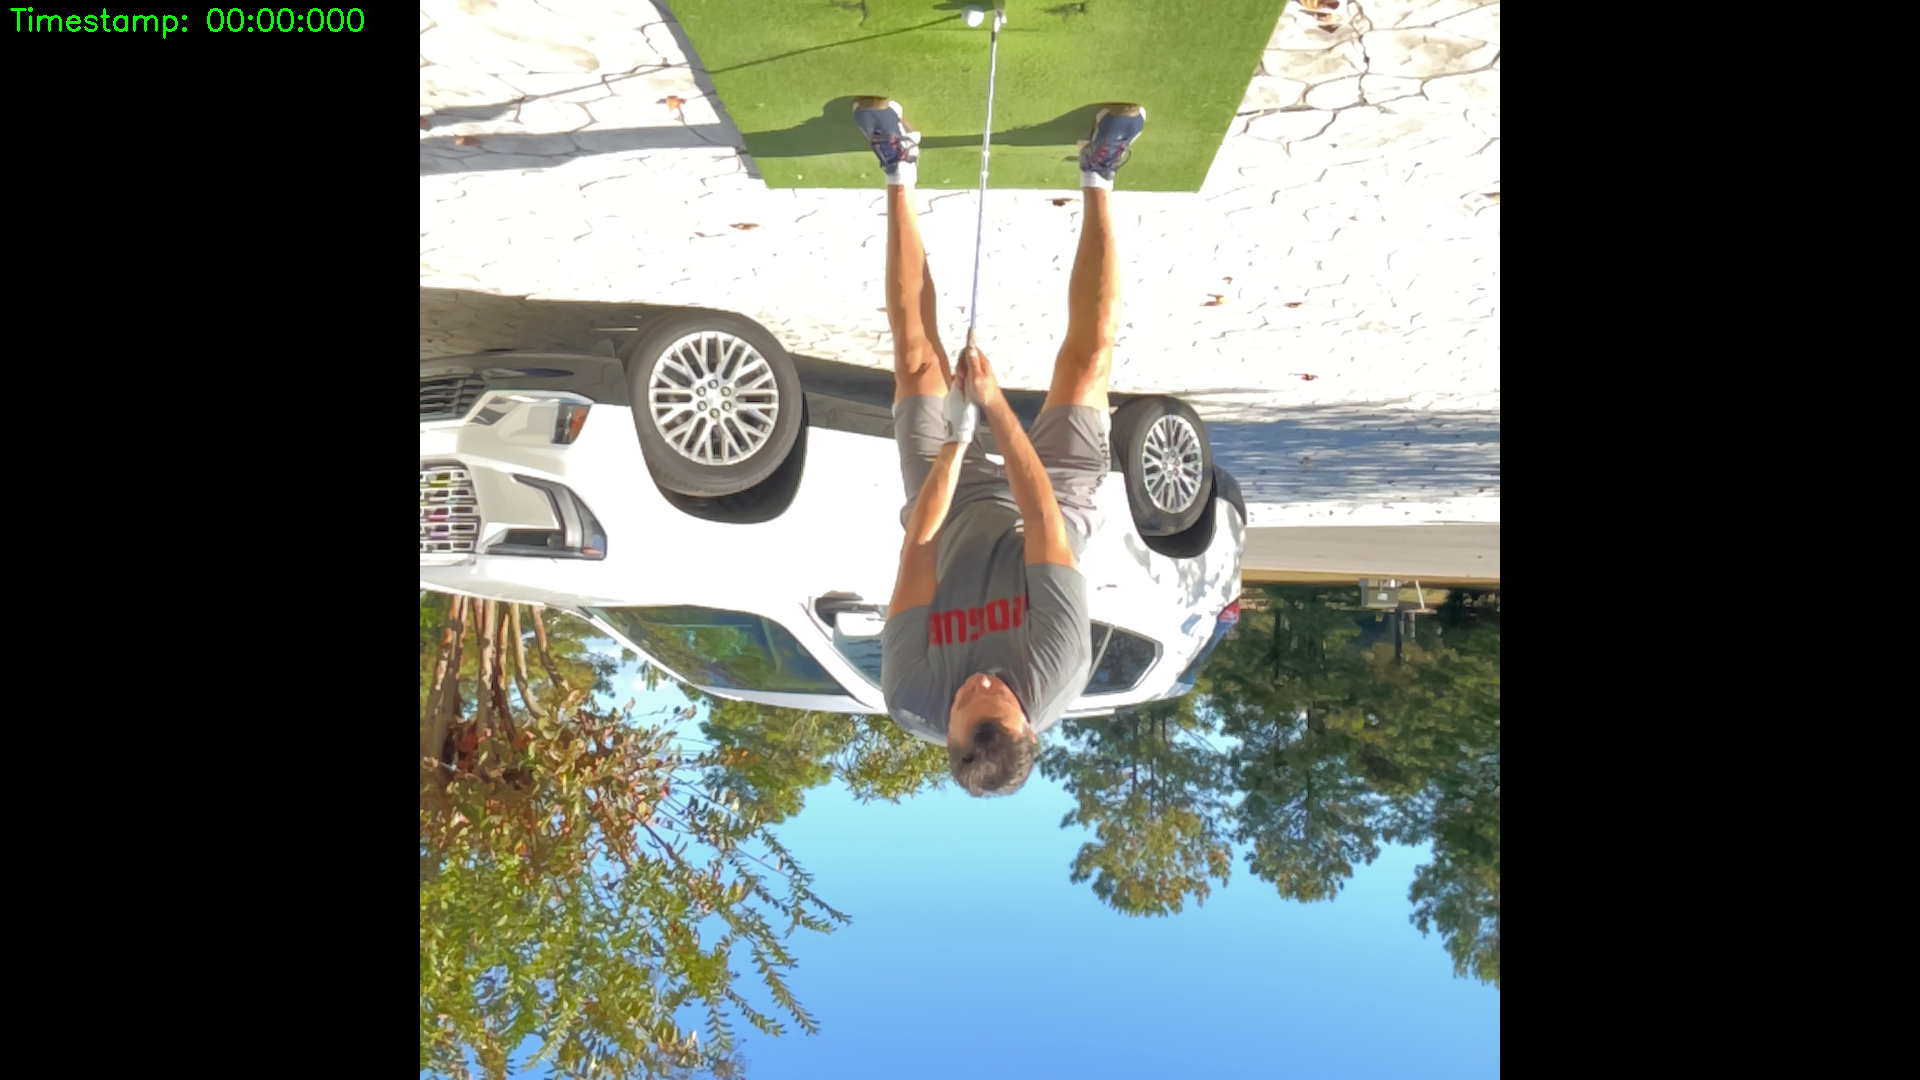

Press:
  1: Mark 'Address'
  2: Mark 'Club Parallel'
  3: Mark 'Arm Parallel'
  4: Mark 'Top of Backswing'
  5: Mark 'DS Transition'
  6: Mark 'DS Arms Parrallel'
  7: Mark 'Impact'
  8: Mark 'Release Post Impact'
  9: Mark 'Finish Lead Arm Parrallel'
  10: Mark 'End of Swing'
  q: Quit


TypeError: ord() expected a character, but string of length 2 found

In [4]:
import os
import cv2
import json
from google.colab.patches import cv2_imshow  # For displaying frames in Colab

# Input and output settings
VIDEO_DIR = "/content/Swing Videos"  # Directory containing the videos
OUTPUT_DIR = "processed_videos"  # Base output directory for processed frames
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Define key swing positions for annotation
swing_phases = [
     {"name": "Address", "frame": None, "timestamp": None},
    {"name": "Club Parallel", "frame": None, "timestamp": None},
    {"name": "Arm Parallel", "frame": None, "timestamp": None},
    {"name": "Top of Backswing", "frame": None, "timestamp": None},
    {"name": "DS Transition","frame": None, "timestamp": None},
    {"name": "DS Arms Parrallel", "frame": None, "timestamp": None},
    {"name": "Impact", "frame": None, "timestamp": None},
    {"name": "Release Post Impact", "frame": None, "timestamp": None},
    {"name": "Finish Lead Arm Parrallel", "frame": None, "timestamp": None},
    {"name": "End of Swing", "frame": None, "timestamp": None}
]

def process_video(video_path, output_dir, rotate_angle=180):
    """
    Process a single golf swing video, save frames with timestamps, and allow key segment annotation.

    Args:
        video_path (str): Path to the video file.
        output_dir (str): Directory to save extracted frames and JSON data.
        rotate_angle (float): Angle to rotate the frames (in degrees). Default is None.
    """
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Cannot open video file {video_path}")
        return

    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    video_output_dir = os.path.join(output_dir, video_name)
    os.makedirs(video_output_dir, exist_ok=True)

    key_points = [dict(phase) for phase in swing_phases]  # Copy swing phases
    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            print("End of video reached or error reading frame.")
            break

        # Rotate the frame if needed
        if rotate_angle is not None:
            frame = rotate_frame(frame, rotate_angle)

        # Calculate timestamp
        timestamp = frame_number / frame_rate
        formatted_timestamp = f"{int(timestamp // 60):02}:{int(timestamp % 60):02}:{int((timestamp * 1000) % 1000):03}"

        # Overlay timestamp on the frame
        cv2.putText(frame, f"Timestamp: {formatted_timestamp}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        frame_filename = os.path.join(video_output_dir, f"frame_{frame_number:05d}.jpg")
        cv2.imwrite(frame_filename, frame)

        # Display the frame for annotation
        cv2_imshow(frame)
        print("Press:")
        for i, phase in enumerate(key_points):
            print(f"  {i+1}: Mark '{phase['name']}'")
        print("  q: Quit")

        # Get user input
        key = cv2.waitKey(0) & 0xFF  # Wait indefinitely for a key press

        if key == ord('q'):  # Quit
            break
        elif ord('1') <= key <= ord(str(len(key_points))):  # Mark key position, using ord for comparison.
        # ord('1') <= key <= ord('9')  # Previous implementation, which works for single digits only.
            phase_index = key - ord('1')
            key_points[phase_index]["frame"] = frame_number
            key_points[phase_index]["timestamp"] = formatted_timestamp
            print(f"Marked '{key_points[phase_index]['name']}' at frame {frame_number}, timestamp {formatted_timestamp}")
        frame_number += 1  # Move to the next frame

    cap.release()
    save_key_points(key_points, video_name, output_dir)
    print(f"Processing complete for {video_name}. Frames saved to {video_output_dir}.")

def rotate_frame(frame, angle):
    """
    Rotate the given frame by a specific angle.

    Args:
        frame (numpy.ndarray): The frame to rotate.
        angle (float): The angle (in degrees) to rotate the frame.

    Returns:
        numpy.ndarray: The rotated frame.
    """
    (h, w) = frame.shape[:2]
    center = (w // 2, h // 2)

    # Get the rotation matrix
    matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    rotated = cv2.warpAffine(frame, matrix, (w, h))
    return rotated

def save_key_points(key_points, video_name, output_dir):
    """
    Save key swing position data to a JSON file.

    Args:
        key_points (list): List of swing phase dictionaries with frame numbers and timestamps.
        video_name (str): Name of the video file.
        output_dir (str): Directory to save the JSON file.
    """
    output_file = os.path.join(output_dir, f"{video_name}_key_positions.json")
    with open(output_file, "w") as f:
        json.dump(key_points, f, indent=4)
    print(f"Key positions saved to {output_file}")

def process_all_videos(video_dir, output_dir, rotate_angle=None):
    """
    Process all videos in a directory.

    Args:
        video_dir (str): Directory containing the videos.
        output_dir (str): Base directory to save processed video frames and annotations.
        rotate_angle (float): Angle to rotate the frames (in degrees). Default is None.
    """
    video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mov'))]

    for video_file in video_files:
        video_path = os.path.join(video_dir, video_file)
        process_video(video_path, output_dir, rotate_angle)

# Run the script with no frame skipping (Processes ALL Frames)
process_all_videos(VIDEO_DIR, OUTPUT_DIR, rotate_angle=90)  # Set rotate_angle to None if no rotation needed


NameError: name 'frame' is not defined